## Terminology Extraction


In [1]:
import pandas as pd
# load the dataset
dataset = pd.read_csv('text.csv')
dataset.head()

,authors,category,content,date,id,img_src,section,tags,title,topics,url
0,Dale Chang,Startups,\n\nTech investing isn’t what it used to be — ...,2016-10-15,1401293,https://tctechcrunch2011.files.wordpress.com/2...,startups/,data,How startups can use data to grow smarter,NaN,https://techcrunch.com/2016/10/15/how-startups...
1,"Ben Narasin,Jeremy Abelson",Fundings & Exits,\n\nThe IPO market is poised to make an almost...,2016-10-14,1399050,https://tctechcrunch2011.files.wordpress.com/2...,startups/,ipo,"While the IPO market roars back, venture remai...",NaN,https://techcrunch.com/2016/10/14/while-the-ip...
2,Matthew Lynley,Apps,Under pressure from shoppers complaining about...,2016-10-14,1401954,https://tctechcrunch2011.files.wordpress.com/2...,startups/,apoorva-mehta,"Instacart reverses course, re-introducing tips...",instacart,https://techcrunch.com/2016/10/14/instacart-re...
3,"Matthew Lynley,Ingrid Lunden",Fundings & Exits,"PayPal, the giant digital payments company tha...",2016-10-14,1390023,https://tctechcrunch2011.files.wordpress.com/2...,startups/,gofundme,PayPal mulled buying GoFundMe,paypal,https://techcrunch.com/2016/10/14/paypal-gobuyme/
4,Megan Rose Dickey,Startups,"Uber, the ridesharing behemoth that recently b...",2016-10-13,1401633,https://tctechcrunch2011.files.wordpress.com/2...,startups/,lawsuits,Uber hits another roadblock,uber,https://techcrunch.com/2016/10/13/uber-hits-an...


In [19]:
dataset = dataset.drop('section', axis=1)

In [56]:
dataset.content

0        0        \n\nTech investing isn’t what it used...
1        0        \n\nTech investing isn’t what it used...
2        0        \n\nTech investing isn’t what it used...
3        0        \n\nTech investing isn’t what it used...
4        0        \n\nTech investing isn’t what it used...
                               ...                        
39110    0        \n\nTech investing isn’t what it used...
39111    0        \n\nTech investing isn’t what it used...
39112    0        \n\nTech investing isn’t what it used...
39113    0        \n\nTech investing isn’t what it used...
39114    0        \n\nTech investing isn’t what it used...
Name: content, Length: 39115, dtype: object

In [26]:
#dataset = dataset[dataset.abstract != 'Abstract Missing']

In [57]:
dataset.head()

,content,title,word_count
0,0 \n\nTech investing isn’t what it used...,How startups can use data to grow smarter,668
1,0 \n\nTech investing isn’t what it used...,"While the IPO market roars back, venture remai...",881
2,0 \n\nTech investing isn’t what it used...,"Instacart reverses course, re-introducing tips...",651
3,0 \n\nTech investing isn’t what it used...,PayPal mulled buying GoFundMe,655
4,0 \n\nTech investing isn’t what it used...,Uber hits another roadblock,455


In [81]:
dataset['word_count'] = dataset['title'].apply(lambda x: len(str(x).split(" ")))
dataset[['title','word_count']].head()

,title,word_count
0,How startups can use data to grow smarter,8
1,"While the IPO market roars back, venture remai...",9
2,"Instacart reverses course, re-introducing tips...",7
3,PayPal mulled buying GoFundMe,4
4,Uber hits another roadblock,4


In [82]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count    39115.000000
mean        11.813601
std          3.262987
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         40.000000
Name: word_count, dtype: float64

In [83]:
#Identify common words
#!pip3 install pandas --user
import pandas as pd
dataset.content = str(dataset.content).replace('\n',' ').replace('\n\n',' ')
freq = pd.Series(' '.join(dataset['title']).split()).value_counts()
freq

To              13415
The              8942
For              7836
A                7356
And              6126
                ...  
Launchers           1
beds                1
Unmute              1
‘Full-Stack’        1
Scales.             1
Length: 45887, dtype: int64

In [84]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset 
         ['title']).split()).value_counts()[-20:]
freq1

Chatterbox,      1
Boostable,       1
Descriptions     1
Market;          1
C670X            1
timelines        1
Web-Connected    1
Pay-Per-Call     1
Fireside         1
Skydrive         1
Avatar           1
Kudos,           1
Anger            1
Hotlist          1
“Unicorn”        1
Launchers        1
beds             1
Unmute           1
‘Full-Stack’     1
Scales.          1
dtype: int64

In [86]:
dataset.title

0                How startups can use data to grow smarter
1        While the IPO market roars back, venture remai...
2        Instacart reverses course, re-introducing tips...
3                            PayPal mulled buying GoFundMe
4                              Uber hits another roadblock
                               ...                        
39110    Booktango Automatically Publishes Your Timeles...
39111    Want An In-App Notification Center? There’s A ...
39112    Urbanspoon: Traffic Up 80% In 2011, Mobile Gro...
39113    YippieMove Wants To Become The Twilio Of Email...
39114    With Speeksy, Facebook Users Can Meet New Peop...
Name: title, Length: 39115, dtype: object

In [87]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [88]:
# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/shivi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/shivi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [91]:
corpus = []

text = re.sub('[^a-zA-Z]', ' ', str(dataset.title))

In [92]:
#Convert to lowercase
text = text.lower()

In [93]:
#remove tags
text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
# remove special characters and digits
text=re.sub("(\\d|\\W)+"," ",text)
    
##Convert to list from string
text = text.split()
    
##Stemming
ps=PorterStemmer()
#Lemmatisation
lem = WordNetLemmatizer()
text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
text = " ".join(text)
corpus.append(text)

In [94]:
#View corpus item
corpus

['startup use data grow smarter ipo market roar back venture remai instacart revers course introducing tip paypal mulled buying gofundme uber hit another roadblock booktango automatically publishes timeles want app notification center urbanspoon traffic mobile gro yippiemove want become twilio email speeksy facebook user meet peop name title length dtype object']

In [95]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

UsageError: Line magic function `%` not found.


In [96]:
from sklearn.feature_extraction.text import CountVectorizer
import re
max_df = 0.7 # Removes terms with DF higher than the 70% of the documents

min_df = 5 # Terms must have DF >= 5 to be considered
cv=CountVectorizer(max_df,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [97]:
list(cv.vocabulary_.keys())[:10]

['startup',
 'use',
 'data',
 'grow',
 'smarter',
 'ipo',
 'market',
 'roar',
 'back',
 'venture']

In [98]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

NameError: name 'pandas' is not defined

               Bi-gram  Freq
0          startup use     1
1             use data     1
2            data grow     1
3         grow smarter     1
4          smarter ipo     1
5           ipo market     1
6          market roar     1
7            roar back     1
8         back venture     1
9        venture remai     1
10     remai instacart     1
11    instacart revers     1
12       revers course     1
13  course introducing     1
14     introducing tip     1
15          tip paypal     1
16       paypal mulled     1
17       mulled buying     1
18     buying gofundme     1
19       gofundme uber     1


[Text(0, 0, 'startup use'),
 Text(0, 0, 'use data'),
 Text(0, 0, 'data grow'),
 Text(0, 0, 'grow smarter'),
 Text(0, 0, 'smarter ipo'),
 Text(0, 0, 'ipo market'),
 Text(0, 0, 'market roar'),
 Text(0, 0, 'roar back'),
 Text(0, 0, 'back venture'),
 Text(0, 0, 'venture remai'),
 Text(0, 0, 'remai instacart'),
 Text(0, 0, 'instacart revers'),
 Text(0, 0, 'revers course'),
 Text(0, 0, 'course introducing'),
 Text(0, 0, 'introducing tip'),
 Text(0, 0, 'tip paypal'),
 Text(0, 0, 'paypal mulled'),
 Text(0, 0, 'mulled buying'),
 Text(0, 0, 'buying gofundme'),
 Text(0, 0, 'gofundme uber')]

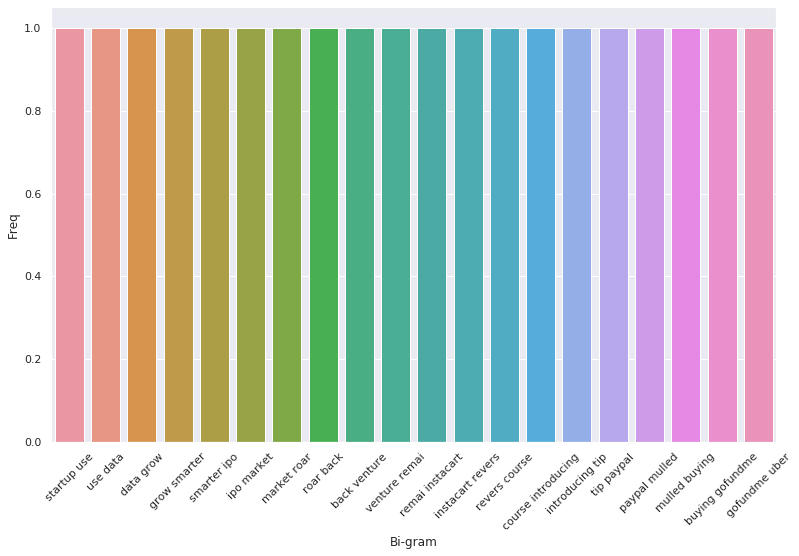

In [99]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                     Tri-gram  Freq
0            startup use data     1
1               use data grow     1
2           data grow smarter     1
3            grow smarter ipo     1
4          smarter ipo market     1
5             ipo market roar     1
6            market roar back     1
7           roar back venture     1
8          back venture remai     1
9     venture remai instacart     1
10     remai instacart revers     1
11    instacart revers course     1
12  revers course introducing     1
13     course introducing tip     1
14     introducing tip paypal     1
15          tip paypal mulled     1
16       paypal mulled buying     1
17     mulled buying gofundme     1
18       buying gofundme uber     1
19          gofundme uber hit     1


[Text(0, 0, 'startup use data'),
 Text(0, 0, 'use data grow'),
 Text(0, 0, 'data grow smarter'),
 Text(0, 0, 'grow smarter ipo'),
 Text(0, 0, 'smarter ipo market'),
 Text(0, 0, 'ipo market roar'),
 Text(0, 0, 'market roar back'),
 Text(0, 0, 'roar back venture'),
 Text(0, 0, 'back venture remai'),
 Text(0, 0, 'venture remai instacart'),
 Text(0, 0, 'remai instacart revers'),
 Text(0, 0, 'instacart revers course'),
 Text(0, 0, 'revers course introducing'),
 Text(0, 0, 'course introducing tip'),
 Text(0, 0, 'introducing tip paypal'),
 Text(0, 0, 'tip paypal mulled'),
 Text(0, 0, 'paypal mulled buying'),
 Text(0, 0, 'mulled buying gofundme'),
 Text(0, 0, 'buying gofundme uber'),
 Text(0, 0, 'gofundme uber hit')]

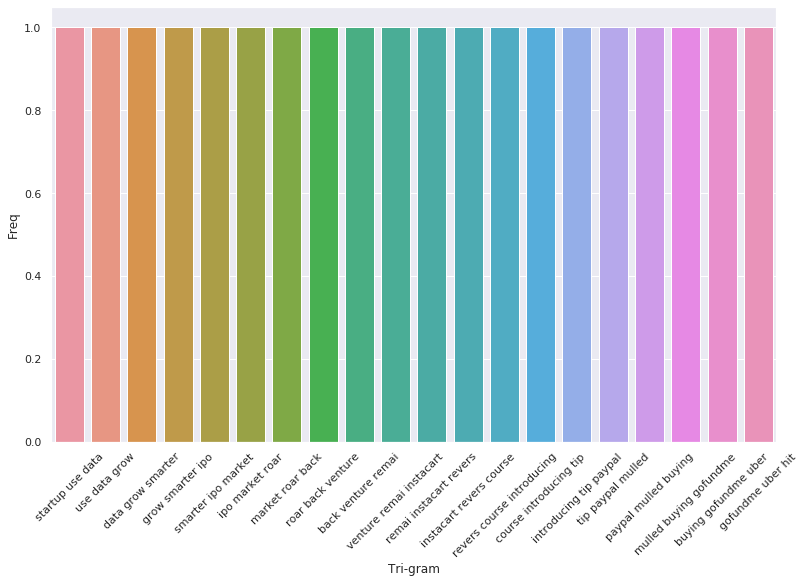

In [100]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [101]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc = " "
for i in corpus:
    doc= i.lower()
    print(doc)
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc.lower()]))

startup use data grow smarter ipo market roar back venture remai instacart revers course introducing tip paypal mulled buying gofundme uber hit another roadblock booktango automatically publishes timeles want app notification center urbanspoon traffic mobile gro yippiemove want become twilio email speeksy facebook user meet peop name title length dtype object


In [102]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])



Abstract:
startup use data grow smarter ipo market roar back venture remai instacart revers course introducing tip paypal mulled buying gofundme uber hit another roadblock booktango automatically publishes timeles want app notification center urbanspoon traffic mobile gro yippiemove want become twilio email speeksy facebook user meet peop name title length dtype object

Keywords:
want 0.162
yippiemove want become 0.081
yippiemove want 0.081
yippiemove 0.081
want become twilio 0.081


In [103]:
len(dataset)

39115